In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd


In [2]:

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = '/kaggle/input/motionsense-dataset/A_DeviceMotion_data'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

In [3]:
data_frame

,Unnamed: 0,subject_id,session_id,category,age,gender,height,weight,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,16,1,dws,29,0,172,96,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,1,16,1,dws,29,0,172,96,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,2,16,1,dws,29,0,172,96,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,3,16,1,dws,29,0,172,96,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,4,16,1,dws,29,0,172,96,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,6859,7,7,wlk,30,0,175,62,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,6860,7,7,wlk,30,0,175,62,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,6861,7,7,wlk,30,0,175,62,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,6862,7,7,wlk,30,0,175,62,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [4]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,category,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,dws,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,dws,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,dws,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,dws,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,dws,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,wlk,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,wlk,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,wlk,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,wlk,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [5]:
x, y = df.iloc[:, 1:], df.iloc[:, 0:1]
print(x.shape)
print(y.shape)

(1412865, 12)
(1412865, 1)


In [6]:
y['category'].unique()

array(['dws', 'ups', 'sit', 'wlk', 'std', 'jog'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((282573, 12), (282573,), (1130292, 12), (1130292,))

In [9]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='relu',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=128,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=84,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=128,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 84)                10836     
                                                                 
 dense_3 (Dense)             (None, 128)               10880     
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 31642 (123.60 KB)
Trainable params: 31642 

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history = model.fit(x_train, y_train, batch_size = 64, epochs= 200,validation_data = (x_test,y_test))

Epoch 1/200
17661/17661 [==============================] - 44s 2ms/step - loss: 0.5208 - val_loss: 0.4272
Epoch 2/200
17661/17661 [==============================] - 42s 2ms/step - loss: 0.4419 - val_loss: 0.3905
Epoch 3/200
17661/17661 [==============================] - 42s 2ms/step - loss: 0.4149 - val_loss: 0.3618
Epoch 4/200
17661/17661 [==============================] - 42s 2ms/step - loss: 0.3997 - val_loss: 0.3471
Epoch 5/200
17661/17661 [==============================] - 47s 3ms/step - loss: 0.3877 - val_loss: 0.3366
Epoch 6/200
17661/17661 [==============================] - 46s 3ms/step - loss: 0.3794 - val_loss: 0.3299
Epoch 7/200
17661/17661 [==============================] - 41s 2ms/step - loss: 0.3738 - val_loss: 0.3240
Epoch 8/200
17661/17661 [==============================] - 41s 2ms/step - loss: 0.3683 - val_loss: 0.3205
Epoch 9/200
17661/17661 [==============================] - 46s 3ms/step - loss: 0.3643 - val_loss: 0.3224
Epoch 10/200
17661/17661 [====================

Text(0, 0.5, 'Loss')

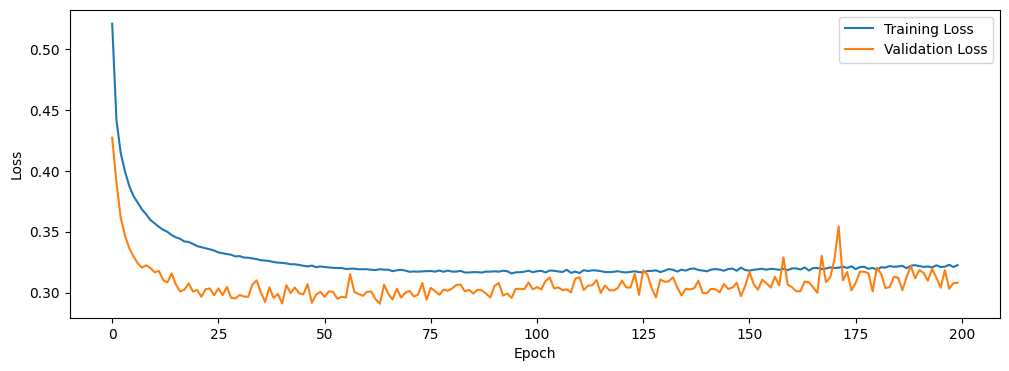

In [11]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [12]:
x_test_copy = np.array(x_test)

In [13]:
# scaling_data = MinMaxScaler()
# x_train = scaling_data.fit_transform(x_train)
# x_test = scaling_data.transform(x_test)

In [14]:
from sklearn import metrics
# logits = model(x_testc)
# prediction_p = tf.nn.softmax(logits)
prediction_p = model.predict(x_test)
predicted_class = np.argmax(prediction_p, axis=1)
accuracy= metrics.accuracy_score(y_true= y_test, y_pred= predicted_class)
print('done prediction... accuracy score = {:.2f}'.format(accuracy*100))

8831/8831 [==============================] - 10s 1ms/step
done prediction... accuracy score = 89.03


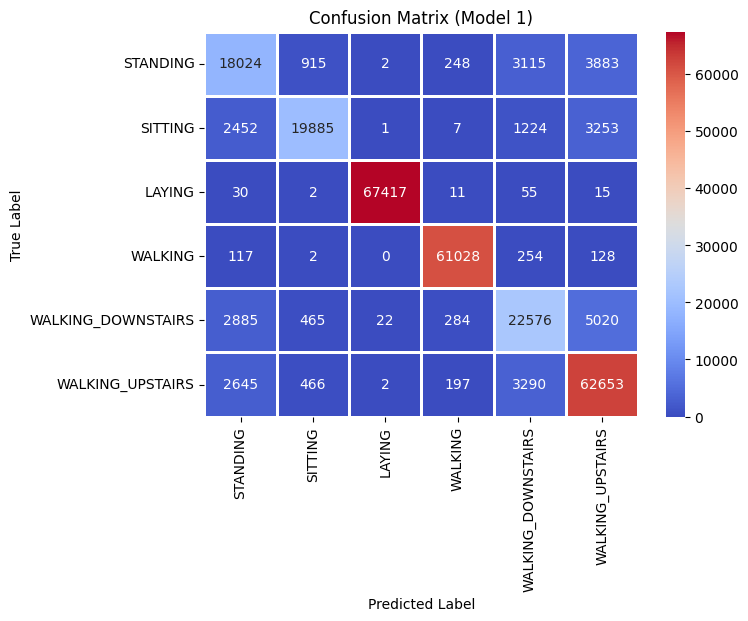

In [15]:
LABELS = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

def show_confusion_matrix():
    plt.figure(figsize=(7, 5))
    sns.heatmap(cd,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix (Model 1)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

cd = metrics.confusion_matrix(y_test, predicted_class)
show_confusion_matrix()

Normalized Confusion Matrix:


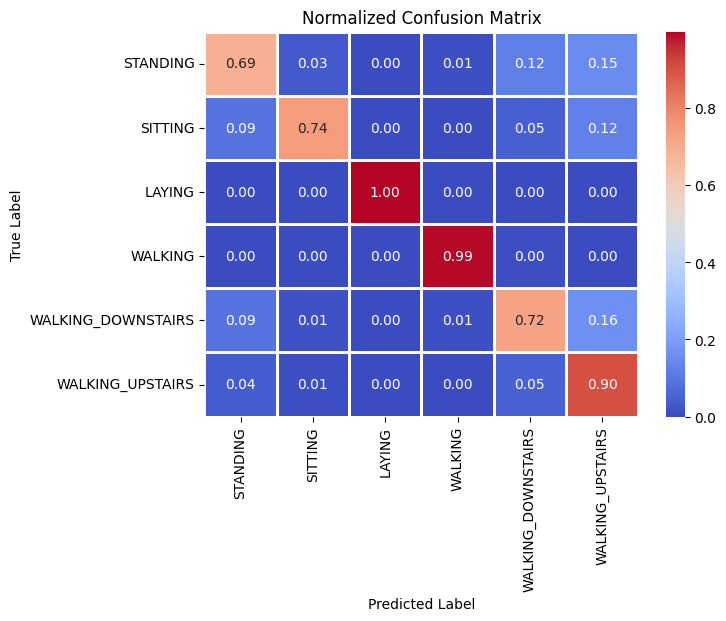

In [16]:
normalized_confusion_matrix = cd.astype('float') / cd.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
LABELS = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']
def show_confusion_matrix():
    plt.figure(figsize=(7, 5))
    sns.heatmap(normalized_confusion_matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='.2f')  # Display values as floats with 2 decimal places
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to display the normalized confusion matrix
show_confusion_matrix()

Normalized Confusion Matrix:


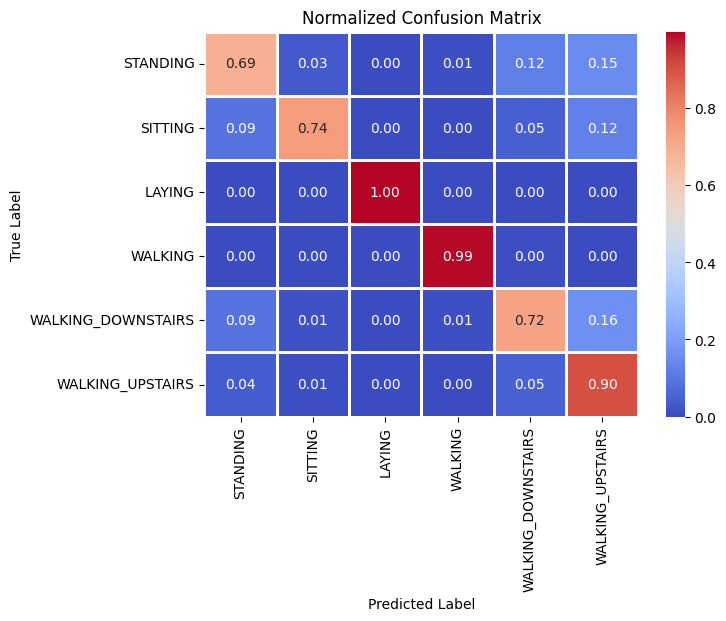

In [17]:
normalized_confusion_matrix = cd.astype('float') / cd.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
LABELS = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']
def show_confusion_matrix():
    plt.figure(figsize=(7, 5))
    sns.heatmap(normalized_confusion_matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='.2f')  # Display values as floats with 2 decimal places
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to display the normalized confusion matrix
show_confusion_matrix()